In this tutorial we will run the approxiamtion embedidng algorithm and compare it with other popular embedding methods, while applying it on several data sets

## Setting up 



In [ ]:
!pip install cvxpy

In [10]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
import scipy
import scipy.spatial
import math
import sys 
import cvxpy as cp
from numpy import linalg as LA
#local imports
import distortion_measures as dm
import metric_spaces as ms
import approx_algo as aa

Setting up various dimesnionality reduction methods

In [12]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def JL_transf(space, k):
    transformer = GaussianRandomProjection(k)
    return transformer.fit_transform(space)


def PCA_transf(space, k):
    transformer = PCA(n_components=k, whiten = False, svd_solver='full')
    return transformer.fit_transform(space)


def TSNE_transf(space, k): 
    transformer = TSNE(n_components=k, init='random', learning_rate='auto', method='exact')
    return transformer.fit_transform(space)

# Synthetic non-Euclidean metric space
We are setup to experiment with the algorithm. We start with running it on a synthetic data set.

In the paper we test our implementation on the synthetically generated data set  X  of the following form. We first randomly sample  n=100  vectors, each of dimension  d=100 . This forms a Euclidean metric space. We then add a small random noise to the pairwise distances in such a way that the reuslting distances represent a valid non-Euclidean metric space.

In [18]:
dists_data=ms.get_random_epsilon_close_non_Eucl(100, 0.8)
#test for being non-Euclidean
print("Is X a Euclidean metric?", ms.is_Euclidean_space(dists_data**2)==True)

Is X a Euclidean metric? False


Lets apply PCA and Approx_algo on the generated space and embed into 2, 5, and 10 dimesnions. The distortion objective is stress_2.

Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step


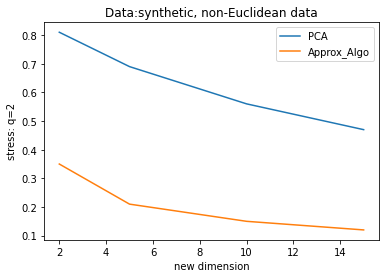

In [54]:
new_dims=np.array([2,5,10,15])
q=2


PCA_distorts=np.zeros(len(new_dims))
input_space=ms.space_from_dists(dists_data)

for i in range(len(new_dims)): 
  embedded=PCA_transf(input_space, new_dims[i])
  PCA_distorts[i]=dm.stress(dists_data, ms.space_to_dist(embedded), q)


Approx_Algo_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedded=aa.Approx_Algo(dists_data,new_dims[i],q,objective='stress')
  Approx_Algo_distorts[i]=dm.stress(dists_data, ms.space_to_dist(embedded), q)
 
#plotting results 
import matplotlib.pyplot as plt
def results_plot(range_k, distorts_embedding_list, measure_type,order,data_type):
    plt.figure()
    for i in range(len(distorts_embedding_list)):
        distorts_to_plot=np.around(distorts_embedding_list[i][0],2)
        label_str=distorts_embedding_list[i][1]
        plt.plot(range_k, distorts_to_plot, label=label_str)
    
    plt.legend(loc="upper right")
    plt.xlabel("new dimension")
    plt.ylabel(measure_type+': q='+str(order))
    plt.title("Data:"+ data_type)
    plt.show()

distorts=[PCA_distorts, Approx_Algo_distorts]

embeddings=['PCA','Approx_Algo']
dist_emb_list=list(zip(distorts, embeddings))

results_plot(new_dims,dist_emb_list, 'stress', q, 'synthetic, non-Euclidean data')


Same setup, but optimizing for the energy_2 distortion

Warrning: metric_spaces: space_from_dists The distance matrix is non-Euclidean, an approximation will be returned.
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step


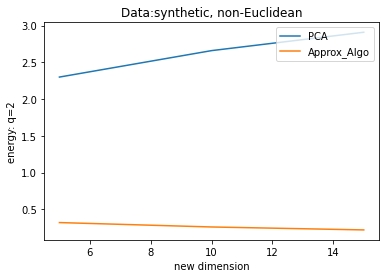

In [59]:
new_dims=np.array([5,10,15])
dists_data=ms.get_random_epsilon_close_non_Eucl(50, 0.8)
input_space=ms.space_from_dists(dists_data)
PCA_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)): 
  embedded=PCA_transf(input_space, new_dims[i])
  PCA_distorts[i]=dm.energy(dists_data, ms.space_to_dist(embedded), q)


Approx_Algo_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedded=aa.Approx_Algo(dists_data,new_dims[i],q,objective='energy')
  Approx_Algo_distorts[i]=dm.energy(dists_data, ms.space_to_dist(embedded), q)

distorts=[PCA_distorts, Approx_Algo_distorts]

embeddings=['PCA','Approx_Algo']
dist_emb_list=list(zip(distorts, embeddings))

results_plot(new_dims,dist_emb_list, 'energy', q, 'synthetic, non-Euclidean') 

Note how bad is the performance of the PCA compared to our algo. 

Warrning: metric_spaces: space_from_dists The distance matrix is non-Euclidean, an approximation will be returned.
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step


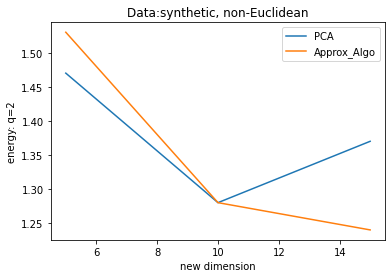

In [60]:
#PCA with Approx_algo for lq_dist
new_dims=np.array([5,10,15])
dists_data=ms.get_random_epsilon_close_non_Eucl(50, 0.8)
input_space=ms.space_from_dists(dists_data)
PCA_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)): 
  embedded=PCA_transf(input_space, new_dims[i])
  PCA_distorts[i]=dm.lq_dist(dists_data, ms.space_to_dist(embedded), q)


Approx_Algo_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedded=aa.Approx_Algo(dists_data,new_dims[i],q,objective='lq_dist')
  Approx_Algo_distorts[i]=dm.lq_dist(dists_data, ms.space_to_dist(embedded), q)

distorts=[PCA_distorts, Approx_Algo_distorts]

embeddings=['PCA','Approx_Algo']
dist_emb_list=list(zip(distorts, embeddings))

results_plot(new_dims,dist_emb_list, 'energy', q, 'synthetic, non-Euclidean') 

# Comparing with PYMDE embedding implementation

when applying on the same synthetic dataset of a smaller size n=50, and optimizing for l_2 - distortion. Note how large is distortion of the pymde embedding when embedding into small dimesnions dimensions. In particular, when embedidng ino 5 dims the distortion is 120. While our mbedidng has distortion close to 1. The small dimesnion regime is particulalrly important for the visualization purposes.

In [ ]:
!pip install pymde

Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step


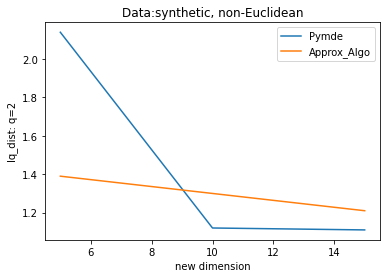

In [64]:
import pymde
import torch

new_dims=np.array([5,10,15])
dists_data=ms.get_random_epsilon_close_non_Eucl(50,0.8)
input_dists=pymde.Graph(dists_data)

pymde_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedding=pymde.preserve_distances(input_dists, new_dims[i])
  #returns the vectors in k dims
  result=embedding.embed().numpy()
  result_dists=ms.space_to_dist(result)
  pymde_distorts[i]=dm.lq_dist(dists_data, result_dists,q)


Approx_Algo_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedded=aa.Approx_Algo(dists_data,new_dims[i],q,objective='lq_dist')
  Approx_Algo_distorts[i]=dm.lq_dist(dists_data, ms.space_to_dist(embedded), q)

distorts=[pymde_distorts, Approx_Algo_distorts]
embeddings=['Pymde','Approx_Algo']
dist_emb_list=list(zip(distorts, embeddings))

results_plot(new_dims,dist_emb_list, 'lq_dist', q,'synthetic, non-Euclidean')



The same setting, but optimizing for the stress_2 distortion. In this case pymde embedidng gives slightly better results.

Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step


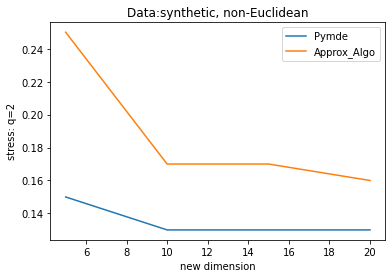

In [71]:
#Pymde versus Approx_Alfo for STRESS
#TO DO: run several times for accounting the randomness . On the same input space
new_dims=np.array([5,10,15,20])
dists_data=ms.get_random_epsilon_close_non_Eucl(100,0.8)
input_dists=pymde.Graph(dists_data)

pymde_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedding=pymde.preserve_distances(input_dists, new_dims[i])
  #returns the vectors in k dims
  result=embedding.embed().numpy()
  result_dists=ms.space_to_dist(result)
  pymde_distorts[i]=dm.stress(dists_data, result_dists,q)


Approx_Algo_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedded=aa.Approx_Algo(dists_data,new_dims[i],q,objective='stress')
  Approx_Algo_distorts[i]=dm.stress(dists_data, ms.space_to_dist(embedded), q)

distorts=[pymde_distorts, Approx_Algo_distorts]
embeddings=['Pymde','Approx_Algo']
dist_emb_list=list(zip(distorts, embeddings))

results_plot(new_dims,dist_emb_list, 'stress', q, 'synthetic, non-Euclidean')


To be fair, we run pymde on the *Euclidean* data sets, since the method is promised to give better results on such data sets. The ruslt is slightly better than the Approx_Algo provide. However, for the importatnt case of small number of dimension, k=2,3 our Approx_Algo is considerably better.


Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step
Solving the cvxpy problem ...
The problem has been solved, continuing to the RP step


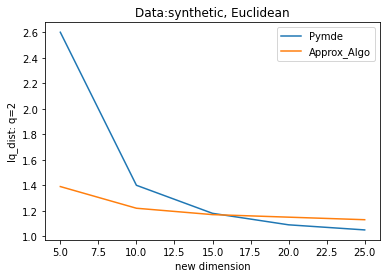

In [61]:
#pymde versus Approx_Algo lq_DIST
new_dims=np.array([5,10,15,20,25])
data=ms.get_random_space(200,200)
dists_data=ms.space_to_dist(data)

input_dists=pymde.Graph(dists_data)

pymde_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedding=pymde.preserve_distances(input_dists, new_dims[i])
  #returns the vectors in k dims
  result=embedding.embed().numpy()
  result_dists=ms.space_to_dist(result)
  pymde_distorts[i]=dm.lq_dist(dists_data, result_dists,q)


Approx_Algo_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedded=aa.Approx_Algo(dists_data,new_dims[i],q,objective='lq_dist')
  Approx_Algo_distorts[i]=dm.lq_dist(dists_data, ms.space_to_dist(embedded), q)

distorts=[pymde_distorts, Approx_Algo_distorts]
embeddings=['Pymde','Approx_Algo']
dist_emb_list=list(zip(distorts, embeddings))

results_plot(new_dims,dist_emb_list, 'lq_dist', q, 'synthetic, Euclidean')


Compare pymde with the pure JL

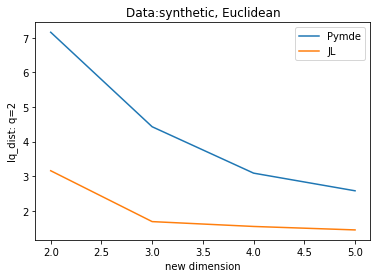

In [62]:
#embedding into small dimensions
new_dims=np.array([2,3,4,5])
data=ms.get_random_space(200,200)
dists_data=ms.space_to_dist(data)

input_dists=pymde.Graph(dists_data)

pymde_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedding=pymde.preserve_distances(input_dists, new_dims[i])
  #returns the vectors in k dims
  result=embedding.embed().numpy()
  result_dists=ms.space_to_dist(result)
  pymde_distorts[i]=dm.lq_dist(dists_data, result_dists,q)


JL_distorts=np.zeros(len(new_dims))
for i in range(len(new_dims)):
  embedded=JL_transf(data,new_dims[i])
  JL_distorts[i]=dm.lq_dist(dists_data, ms.space_to_dist(embedded), q)

distorts=[pymde_distorts, JL_distorts]
embeddings=['Pymde','JL']
dist_emb_list=list(zip(distorts, embeddings))

results_plot(new_dims,dist_emb_list, 'lq_dist', q, 'synthetic, Euclidean')

#Conclusions

-- When applying pymde on non-Euclidean adata sets, synthetic and real, the method gives poor results for small traget dimesnions. Implying its poor feasibily for visualization tasks. 

-- In contrast, our Approx_Algo embedding has near optimal gurantees in all regimes of target dimesnion, and in particular in the regime of k=2,3 making it a good tool for visualization.